In [78]:
import json
import pandas as pd
import numpy as np
from konlpy.tag import Komoran
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from time import time
import pickle
import os

###  Load Data 

In [3]:
with open('sample.csv','r') as f:
    data = f.read()
    lines = data.split('\n')

In [4]:
print(lines[0])

no,movie,content,rate


In [5]:
print(lines[1])

14335294,군함도,최악의 역사왜곡영화다 이거는,1


In [6]:
len(lines)

9587

In [13]:
len(data)

504798

###  Data Frame으로 변환

In [58]:
df = pd.read_csv('sample.csv', encoding='euc-kr')

In [59]:
df.describe()

,no,rate
count,9.585000e+03,9585.000000
mean,1.432988e+07,8.718310
std,3.146935e+03,2.484162
min,1.432442e+07,1.000000
25%,1.432714e+07,8.000000
50%,1.432989e+07,10.000000
75%,1.433261e+07,10.000000
max,1.433529e+07,10.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9585 entries, 0 to 9584
Data columns (total 4 columns):
no         9585 non-null int64
movie      9585 non-null object
content    9585 non-null object
rate       9585 non-null int64
dtypes: int64(2), object(2)
memory usage: 299.6+ KB


In [61]:
df.head(10)

,no,movie,content,rate
0,14335294,군함도,최악의 역사왜곡영화다 이거는,1
1,14335293,백발마녀전,이 당시 홍콩 영화는 옥석이 심하게 뒤섞인 듯. 이 영화는 아주 고품질의 옥 중의 ...,8
2,14335292,인크레더블 2,잭잭이가 신의한수~~핵겨움~~,8
3,14335291,곤지암,볼만 했음 분위기도 음산하고 으스스한게 괜찮았습니다,8
4,14335290,아수라,실화라고 미리 말했어야죠,10
5,14335289,싱 스트리트,멋지다 그들이 부러웠다,10
6,14335288,앤트맨과 와스프,생각보다 재밌었고 볼만했음,8
7,14335287,툼레이더,"인디아나존스 최후의성전 대놓고 표절했네. 근데 어째 그 옛날 인디아나존스보다 재미,...",1
8,14335286,에어,너무재미있고 농구광인 나에겐 최고의 영화!,9
9,14335285,마녀,재밋음ㅋㅋㅋㅋ 연기도 좋구,10


In [62]:
df_movie = df.drop(['no', 'movie'], axis=1)

In [63]:
df_movie.head(10)

,content,rate
0,최악의 역사왜곡영화다 이거는,1
1,이 당시 홍콩 영화는 옥석이 심하게 뒤섞인 듯. 이 영화는 아주 고품질의 옥 중의 ...,8
2,잭잭이가 신의한수~~핵겨움~~,8
3,볼만 했음 분위기도 음산하고 으스스한게 괜찮았습니다,8
4,실화라고 미리 말했어야죠,10
5,멋지다 그들이 부러웠다,10
6,생각보다 재밌었고 볼만했음,8
7,"인디아나존스 최후의성전 대놓고 표절했네. 근데 어째 그 옛날 인디아나존스보다 재미,...",1
8,너무재미있고 농구광인 나에겐 최고의 영화!,9
9,재밋음ㅋㅋㅋㅋ 연기도 좋구,10


In [64]:
# 학습 시킬 데이터프레임 저장 
df_movie.to_pickle("df_movie_review.pkl")

In [65]:
# 피클로 저장한 학습 데이터 프레임 불러오기 
df_movies = pd.read_pickle('df_movie_review.pkl')

In [66]:
df_movies.head(3)

,content,rate
0,최악의 역사왜곡영화다 이거는,1
1,이 당시 홍콩 영화는 옥석이 심하게 뒤섞인 듯. 이 영화는 아주 고품질의 옥 중의 ...,8
2,잭잭이가 신의한수~~핵겨움~~,8


### train set 과 test set  

In [67]:
def split_train_Test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [68]:
train_set, test_set = split_train_Test(df_movies, 0.2)

In [69]:
print('train set :',len(train_set), ', test set :',len(test_set) )

train set : 7668 , test set : 1917


In [70]:
train_set.head(3)

,content,rate
7049,소리가너무.민망해민망행,2
7094,마지막 아내가 위장한거 나올때 브금때문에 그런지 더 소름돋네요 아오.. 등꼴 오싹해,10
2739,안남시장 = 안동 출신 성남 시장?? 의도한거면 소름....,10


In [72]:
train_x, train_y = train_set['content'], train_set['rate']

In [80]:
test_x, test_y = test_set['content'], train_set['rate']

---

## 리뷰 데이터 자연어 처리  

### Tokenizing  

In [77]:
twitter = Twitter()

def tokenizer_twitter_morphs(doc):
    return twitter.morphs(doc)

def tokenizer_twitter_noun(doc):
    return twitter.nouns(doc)

def tokenizer_twitter_pos(doc):
    return twitter.pos(doc, norm=True, stem = True)

In [79]:
kkma = Kkma()

def tokenizer_kkma_noun(doc):
    return kkma.nouns(doc)

def tokenizer_morps(doc):
    return kkma.morphs(doc)

In [83]:
# 학습 데이터 리뷰 토큰화
train_set['train_token'] = train_x.apply(tokenizer_twitter_morphs)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
train_set.head()

,content,rate,train_token
7049,소리가너무.민망해민망행,2,"[소리, 가, 너무, ., 민망, 해, 민망, 행]"
7094,마지막 아내가 위장한거 나올때 브금때문에 그런지 더 소름돋네요 아오.. 등꼴 오싹해,10,"[마지막, 아내, 가, 위장, 한, 거, 나올, 때, 브금, 때문, 에, 그런, 지..."
2739,안남시장 = 안동 출신 성남 시장?? 의도한거면 소름....,10,"[안남, 시장, =, 안동, 출신, 성남, 시장, ??, 의도, 한, 거, 면, 소..."
2294,3편기대합니다~^-^/,10,"[3, 편, 기대합, 니다, ~^-^/]"
6315,정우성 연기보고 정말 놀랬습니다. 어떻게 연기를 그렇게 오래한사람이 젊은 애들한테도...,1,"[정우성, 연기, 보고, 정말, 놀랬습니, 다, ., 어떻, 게, 연기, 를, 그렇..."


In [85]:
# 테스트 데이터 리뷰 토큰화
test_set['test_token'] = test_x.apply(tokenizer_twitter_morphs)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
test_set.head()

,content,rate,test_token
7009,현실고증영화 feet 이재명,10,"[현실, 고증, 영화, feet, 이재명]"
5515,재개봉 합시다!!!!,10,"[재, 개봉, 합, 시, 다, !!!!]"
8004,스릴러 액션 모두 좋네요~,10,"[스릴러, 액션, 모두, 좋, 네요, ~]"
4368,진짜 DVD 소장용 구매완료.진짜 소름... 감독님 대단하신분같음....디테일이....,10,"[진짜, DVD, 소장, 용, 구매, 완료, ., 진짜, 소름, ..., 감독, 님..."
6345,상당한 수작입니다. 그리고 한국 영화계의 빅스타 예고!!! 이런 여주인공이 나오다니♥♥♥,10,"[상당한, 수작, 입니, 다, ., 그리고, 한국, 영화계, 의, 빅스타, 예고, ..."


In [89]:
tokens = [t for d in train_set['train_token'] for t in d]

In [90]:
print(len(tokens))

117803


###  Explore data using NLTK

In [91]:
import nltk

In [92]:
text = nltk.Text(tokens)

In [93]:
print(len(text.tokens))

117803


In [94]:
# 중복을 제거한 토큰의 갯수 
print(len(set(text.tokens)))

11177


In [95]:
# 가장 많이 나온 상위 토큰 
print(text.vocab().most_common(10))

[('.', 3167), ('이', 2844), ('영화', 2421), ('다', 2136), ('가', 1419), ('요', 1338), ('을', 1289), ('도', 1198), ('에', 1166), ('의', 1090)]


In [96]:
# 가장 적게 나온 하위 토큰
print(text.vocab().most_common()[:-20:-1])

[('상이', 1), ('현자', 1), ('노벨', 1), ('수상자', 1), ('노벨상', 1), ('뭔지암', 1), ('믿든드', 1), ('겸비', 1), ('펑퍼펑', 1), ('너넨', 1), ('1532196197079', 1), ('224003665975108322783', 1), ('단말', 1), ('쏘세', 1), ('구점', 1), ('백점만점', 1), ('잭잭귀', 1), ('배틀', 1), ('나옵', 1)]


### Visualization

In [100]:
from matplotlib import font_manager, rc
import matplotlib

#### plot 그릴때 한글 깨지는거 방지 

In [105]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
#폰트 추가
font = font_manager.FontProperties(fname="C:\\WINDOWS\\Fonts\\NGULIM.TTF").get_name()
rc("font", family=font)

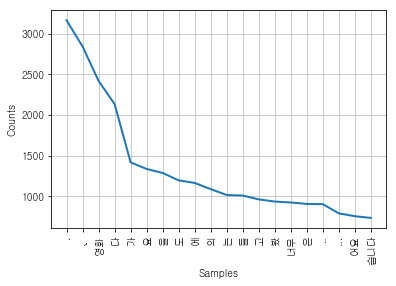

None


In [104]:
print(text.plot(20))